A case study using iris dataset for KNN algorithm

In [3]:
# import modules for this project
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import numpy as np


### Data Generation and Splitting:
*   We used make_blobs to create a simulated dataset with three centers.
*   The dataset is split into training and testing sets with an 80-20 ratio.



In [ ]:
# Generate simulated dataset
centers = [[2, 4], [6, 6], [1, 9]]
n_classes = len(centers)
data, labels = make_blobs(n_samples=150,
                          centers=np.array(centers),
                          random_state=1)

# training testing split (80-20 split of the data)
res = train_test_split(data, labels,
                       train_size=0.8,
                       test_size=0.2,
                       random_state=12)
train_data, test_data, train_labels, test_labels = res

In [4]:
# Printing  the sizes of the resulting arrays
print("Training set size:", len(train_data))
print("Testing set size:", len(test_data))

Training set size: 120
Testing set size: 30


KNN Classifier (knn)

In [10]:
# Perform a KNN analysis of the simulated data
from sklearn.neighbors import KNeighborsClassifier
# classifier "out of the box", no parameters
knn = KNeighborsClassifier()
knn.fit(train_data, train_labels)

# Predict on training data
train_data_predicted = knn.predict(train_data)
train_accuracy = accuracy_score(train_data_predicted, train_labels)
print("Training accuracy:", train_accuracy)

# Predict on testing data
test_data_predicted = knn.predict(test_data)
test_accuracy = accuracy_score(test_data_predicted, test_labels)
print("Testing accuracy:", test_accuracy)

# Re-do KNN using some specific parameters
knn2 = KNeighborsClassifier(algorithm='auto',
                            leaf_size=30,
                            metric='minkowski',
                            p=2,
                            metric_params=None,
                            n_jobs=1,
                            n_neighbors=5,
                            weights='uniform')

knn.fit(train_data, train_labels)
test_data_predicted = knn.predict(test_data)
accuracy_score(test_data_predicted, test_labels)

Training accuracy: 1.0
Testing accuracy: 1.0


1.0

In [7]:
knn2.fit(train_data, train_labels)

# Predict on test data with knn2
test_data_predicted2 = knn2.predict(test_data)
test_accuracy2 = accuracy_score(test_data_predicted2, test_labels)
print("Test accuracy with specific parameters:", test_accuracy2)

# KNN with n_neighbors=1 for comparison
knn3 = KNeighborsClassifier(n_neighbors=1)
knn3.fit(train_data, train_labels)

# Predict on test data with knn3
test_data_predicted3 = knn3.predict(test_data)
test_accuracy3 = accuracy_score(test_data_predicted3, test_labels)
print("Test accuracy with n_neighbors=1:", test_accuracy3)



Test accuracy with specific parameters: 1.0
Test accuracy with n_neighbors=1: 1.0


It seems odd that the test accuracy is 1 for all values of **K**.This can happen if the dataset is perfectly separable, meaning the KNN classifier can classify all test instances correctly regardless of the value of **K**

<ipython-input-16-6a8801d78ecd>:17: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax[0].scatter(test_data[:, 0], test_data[:, 1], c=test_labels, s=50, edgecolor='k', marker='x', label='Test data')
<ipython-input-16-6a8801d78ecd>:27: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax[1].scatter(test_data[:, 0], test_data[:, 1], c=test_labels, s=50, edgecolor='k', marker='x', label='Test data')


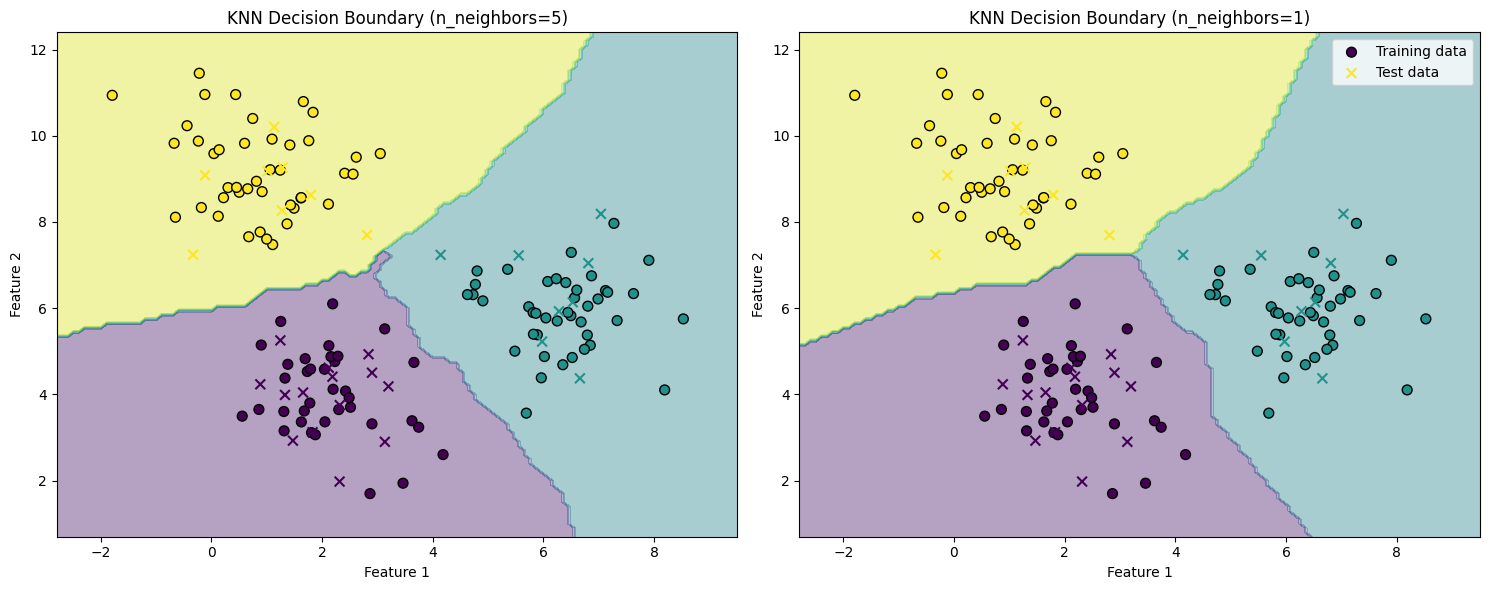

In [16]:
import matplotlib.pyplot as plt
# Plot the results
# Create a mesh grid for plotting decision boundaries
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Plot the decision boundaries for knn and knn3
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# First subplot: knn (n_neighbors=5)
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax[0].contourf(xx, yy, Z, alpha=0.4)
ax[0].scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=50, edgecolor='k', label='Training data')
ax[0].scatter(test_data[:, 0], test_data[:, 1], c=test_labels, s=50, edgecolor='k', marker='x', label='Test data')
ax[0].set_title('KNN Decision Boundary (n_neighbors=5)')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')

# Second subplot: knn3 (n_neighbors=1)
Z = knn3.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax[1].contourf(xx, yy, Z, alpha=0.4)
ax[1].scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=50, edgecolor='k', label='Training data')
ax[1].scatter(test_data[:, 0], test_data[:, 1], c=test_labels, s=50, edgecolor='k', marker='x', label='Test data')
ax[1].set_title('KNN Decision Boundary (n_neighbors=1)')
ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 2')

plt.legend()
plt.tight_layout()
plt.show()
